# Выпускной проект - "Телекоммуникации"

# Описание проекта

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах.

# Описание услуг

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

# Цель работы

Прогноз оттока клиентов, для корректного предложения промокодов и специальных условий всем, кто планирует отказаться от услуг связи.

# Задачи

1. Обучение модели классификации
2. Выбор лучшей модели
3. Рекомендации заказчику

# План работы

1. Загрузка данных

2. Исследовательский анализ и предобработка данных

3. Объединение данных

4. Исследовательский анализ и предобработка данных объединённого датафрейма

5. Подготовка данных

6. Обучение моделей машинного обучения

7. Выбор лучшей модели

8. Общий вывод и рекомендации заказчику

# Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Файл contract_new.csv

- customerID — идентификатор абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

Файл personal_new.csv

- customerID — идентификатор пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.

Файл internet_new.csv

- customerID — идентификатор пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

Файл phone_new.csv

- customerID — идентификатор пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.


## Загрузка данных

Загрузка и обновление библиотек:

In [1]:
!pip install --upgrade \
    numpy \
    pandas \
    matplotlib \
    seaborn \
    shap \
    scikit-learn \
    phik \
    catboost

     |████████████████████████████████| 19.3 MB 1.2 MB/s eta 0:00:0105ta 0:00:01
     |████████████████████████████████| 13.1 MB 43.3 MB/s eta 0:00:01         | 6.1 MB 43.3 MB/s eta 0:00:01     |███████████████████████████████▎| 12.8 MB 43.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 66.9 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 65.4 MB/s eta 0:00:01
     |████████████████████████████████| 539 kB 72.1 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 22.8 MB/s eta 0:00:01                   | 3.7 MB 22.8 MB/s eta 0:00:01:00:01
     |████████████████████████████████| 686 kB 38.3 MB/s eta 0:00:01
     |████████████████████████████████| 98.2 MB 71 kB/s /s eta 0:00:01    | 12.8 MB 58.7 MB/s eta 0:00:02K     |██████▏                         | 19.0 MB 58.7 MB/s eta 0:00:02      | 25.5 MB 58.7 MB/s eta 0:00:02██████████▋                     | 32.4 MB 58.7 MB/s eta 0:00:02     |████████████▌                   | 38.3 MB 58.7 MB/s eta 0:0

Импорт библиотек:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import re
import seaborn as sns
import shap
import warnings
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [3]:
RANDOM_STATE = 80724

In [4]:
# Отключаем предупреждения
warnings.filterwarnings("ignore")

In [5]:
#try:
    #df = pd.read_csv('C:/Users/Кирилл/Desktop/Kirill/Data Sience/toxic_comments.csv', index_col=[0])
#except:
    #df = pd.read_csv('/datasets/toxic_comments.csv', index_col=[0])

df_contract = pd.read_csv('/datasets/contract_new.csv', parse_dates=['BeginDate', 'EndDate'])
df_personal = pd.read_csv('/datasets/personal_new.csv')
df_internet = pd.read_csv('/datasets/internet_new.csv')
df_phone = pd.read_csv('/datasets/phone_new.csv')

Взглянем на датасеты:

In [6]:
def look(df):
    display(df.head(), df.shape)
    df.info()

look(df_contract)
look(df_personal)
look(df_internet)
look(df_phone)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


(7043, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


(7043, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


(5517, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


(6361, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


### Выводы по разделу

Из обзора датасетов видно несколько проблем:
- в файле contract_new.csv два столбца с датой BeginDate и EndDate, однако дата корректно выгрузилась только из столбца BeginDate, так как в столбце EndDate есть строковые значения 'No'
- в этом же файле последний столбец TotalCharges, не первый взгляд должны быть все численные значения, но тип данных указывается как object. Значит что то не так.
- явно обозначенного целевого признака нет, есть предположения, которые проверим в следующем разделе

Также важно уточнить, что количество строк в датафреймах разное, за исключением датафреймов df_contract и df_personal. Еще один момент заключается в том, что все датафреймы имеют значения 'Yes' и 'No', за исключением столбца SeniorCitizen в датарейме personal_new. Как именно заказчик закодировал 0 и 1, то есть что из них что пока не понятно, уточнил у многоуважаемого Александра(тебя), он сказал: "Кирюха, хороший вопрос, забей, методисты накосячили)"

## Предобработка и исследовательский анализ данных

### Предобработка данных

Нужно разобраться в проблемах описанных выше. Для этого посмотрим на уникальные значения в столбцах EndDate и TotalCharges:

In [7]:
display(df_contract['EndDate'].value_counts())
display(df_contract['TotalCharges'].value_counts())

EndDate
No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-09-01       2
2014-12-01       2
2014-06-01       1
2014-10-01       1
2014-11-01       1
Name: count, Length: 67, dtype: int64

TotalCharges
           11
20.45       6
101.0       5
21.53       4
40.1        4
           ..
4357.5      1
3509.55     1
2530.8      1
2599.1      1
7251.82     1
Name: count, Length: 6658, dtype: int64

Видно, что в столбце EndDate есть дата окончания договоров, скорее всего это те люди, которые не заключали договор на 1-2 года, а те кто платит ежемесячно. А вот в столбце TotalCharges есть пустые значения, т.е. пробелы. Их предлагаю удалить, так как их всего лишь 11.

In [8]:
df_contract = df_contract[df_contract['TotalCharges'] != ' ']
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype('float64')
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 494.4+ KB


Так то лучше.

Посмотрим на пропуски в датафреймах:

In [9]:
def nan(df):
    display(df.isna().sum())

nan(df_contract)
nan(df_personal)
nan(df_internet)
nan(df_phone)

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

customerID       0
MultipleLines    0
dtype: int64

Отлично пропусков нет

Взглянем на явные дубликаты:

In [10]:
def dub(df):
    display(df.duplicated().sum())

dub(df_contract)
dub(df_personal)
dub(df_internet)
dub(df_phone)

0

0

0

0

Здорово, а что с неявными?

In [11]:
low_df_contract = ['Type', 'PaymentMethod']
low_df_personal = ['gender']
low_df_internet = ['InternetService']

def n_dub(df, lists):
    df[lists] = df[lists].applymap(lambda x: x.lower() if pd.notnull(x) else x)
    for l in lists:
        print(df[l].unique())
        print(' ')

        
n_dub(df_contract, low_df_contract)
n_dub(df_personal, low_df_personal)
n_dub(df_internet, low_df_internet)

['month-to-month' 'one year' 'two year']
 
['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
 
['female' 'male']
 
['dsl' 'fiber optic']
 


Неявных дубликатов нет, это хорошо, но предлагаю немного сократить строковые значения, для оптически-сексуального эффекта.

In [12]:
df_contract['PaymentMethod'] = df_contract['PaymentMethod'].replace({'bank transfer (automatic)':'bank transfer',
                                                                    'credit card (automatic)':'credit card'})
df_internet['InternetService'] = df_internet['InternetService'].replace({'fiber optic':'optic'})

n_dub(df_contract, low_df_contract)
n_dub(df_internet, low_df_internet)

['month-to-month' 'one year' 'two year']
 
['electronic check' 'mailed check' 'bank transfer' 'credit card']
 
['dsl' 'optic']
 


Ведь лучше стало? Согласен

Исправим кодировку "пенсионеров", примем 0 - "No", а 1 - "Yes"

In [13]:
df_personal['SeniorCitizen'] = df_personal['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df_personal['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

### EDA

Для более удобного анализа, установим столбец customerID во всех датафреймах индексом:

In [14]:
df_contract.set_index('customerID', inplace=True)
df_personal.set_index('customerID', inplace=True)
df_internet.set_index('customerID', inplace=True)
df_phone.set_index('customerID', inplace=True)

#### df_contract

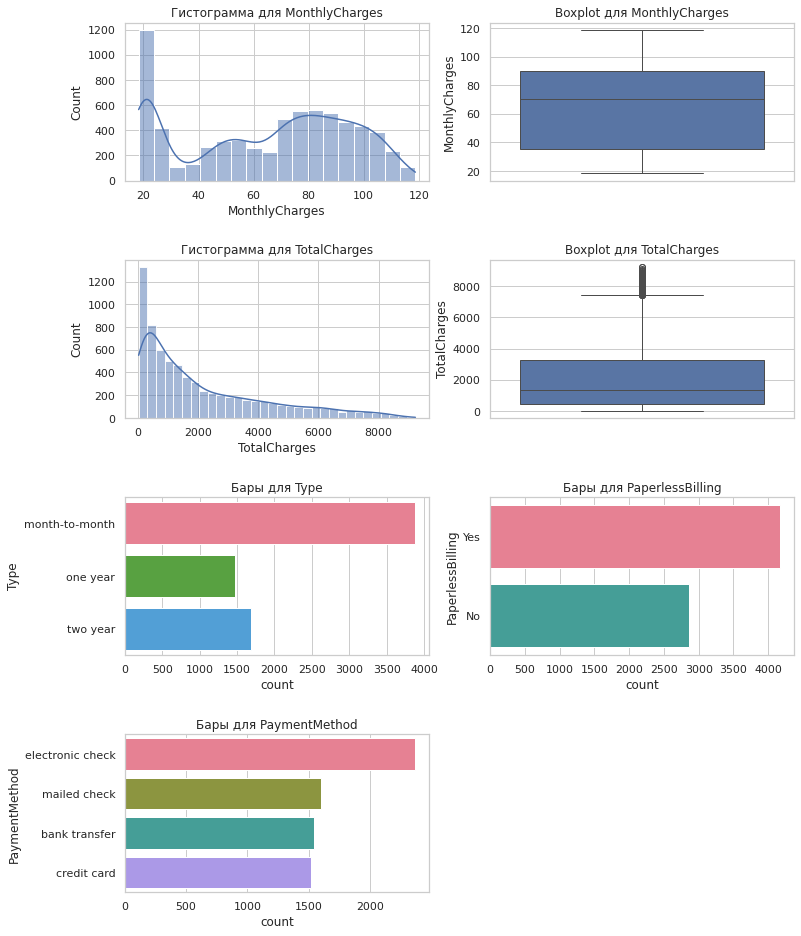

,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,64.798208,2118.621822
std,30.085974,2112.736199
min,18.250000,19.050000
25%,35.587500,439.745000
50%,70.350000,1345.275000
75%,89.862500,3239.317500
max,118.750000,9221.380000


In [15]:
def plot_hist_box(dataframe, numeric_columns, categorical_columns):
    # Устанавливаем стиль seaborn для более красивого отображения
    sns.set(style="whitegrid")

    # Вычисляем количество строк для числовых и категориальных графиков
    num_numeric_rows = len(numeric_columns)
    num_categorical_rows = (len(categorical_columns) + 1) // 2

    # Создаем сетку графиков
    fig, axes = plt.subplots(num_numeric_rows + num_categorical_rows, 2, figsize=(12, (num_numeric_rows + num_categorical_rows) * 4))
    fig.subplots_adjust(hspace=0.5)

    # Проходимся по каждому количественному столбцу и строим гистограмму и вертикальный boxplot
    for i, column in enumerate(numeric_columns):
        # Гистограмма
        sns.histplot(dataframe[column], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Гистограмма для {column}')

        # Вертикальный Boxplot
        sns.boxplot(y=dataframe[column], ax=axes[i, 1], orient='v')
        axes[i, 1].set_title(f'Boxplot для {column}')

    # Проходимся по каждому категориальному столбцу и строим горизонтальные бары
    for i, column in enumerate(categorical_columns):
        row = num_numeric_rows + i // 2
        col = i % 2
        # Горизонтальные бары
        palette = sns.color_palette("husl", len(dataframe[column].unique()))
        sns.countplot(y=column, data=dataframe, ax=axes[row, col], palette=palette)
        axes[row, col].set_title(f'Бары для {column}')

    # Убираем ненужные пустые графики
    if len(categorical_columns) % 2 != 0:
        axes[num_numeric_rows + num_categorical_rows - 1, 1].axis('off')

    plt.show()

# Определяем все категориальные столбцы, исключая BeginDate, EndDate
exclude_columns = ['BeginDate', 'EndDate']
cat_columns_contract = [col for col in df_contract.select_dtypes(exclude='number').columns if col not in exclude_columns]

# Определяем все количественные столбцы
num_columns_contract = df_contract.select_dtypes(include='number').columns.tolist()

# Построение графиков
plot_hist_box(df_contract, num_columns_contract, cat_columns_contract)

df_contract[['MonthlyCharges', 'TotalCharges']].describe()

Краткие выводы:
- средние расходы за месяц 70 рублей
- большинство используют ежемесячный тип оплаты, а также тип платежа "Электронный чек"

В целом аномалий и выбросов нет.

На этом этапе можно проверить гипотезу о том, что те клиенты у которых в столбце EndDate значение 'No' используют ежемесячный тип оплаты:

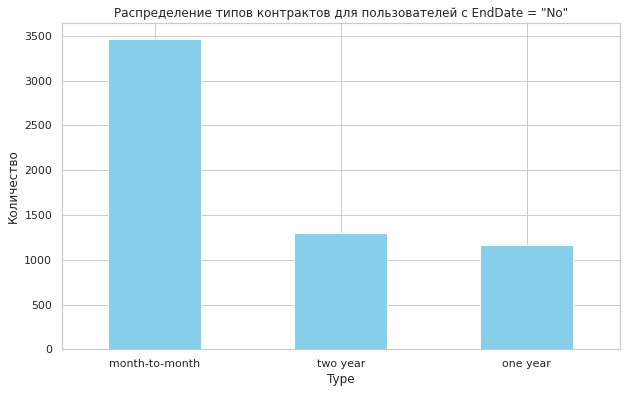

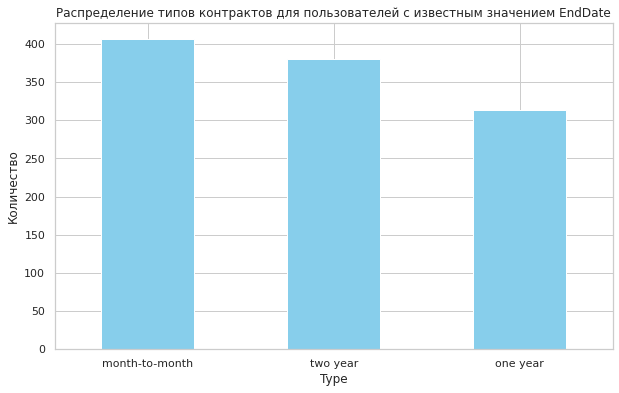

In [16]:
df_contract[df_contract['EndDate'] == 'No']['Type'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Распределение типов контрактов для пользователей с EndDate = "No"')
plt.xlabel('Type')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

df_contract[df_contract['EndDate'] != 'No']['Type'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Распределение типов контрактов для пользователей с известным значением EndDate')
plt.xlabel('Type')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Гипотеза не подтвердилась. Так как среди клиентов с неизвестной датой окончания договора есть и те, кто заключил договор на 1 и 2 года. А значит столбец EndDate по сути и есть целевой признак, так как если есть дата окончания договора - означает клиент ушел, разорвал договор, а значение 'No' указывает на то, что договор еще действует и клиент не ушел и соответственно не разорвал договор. В дальнейшем при подготовке данных для обучения моделей, необходимо будет самостоятельно закодировать все даты как 'Yes' - клиент разорвал договор, а значение 'No' соответственно - клиент не разорвал договор.

#### df_personal

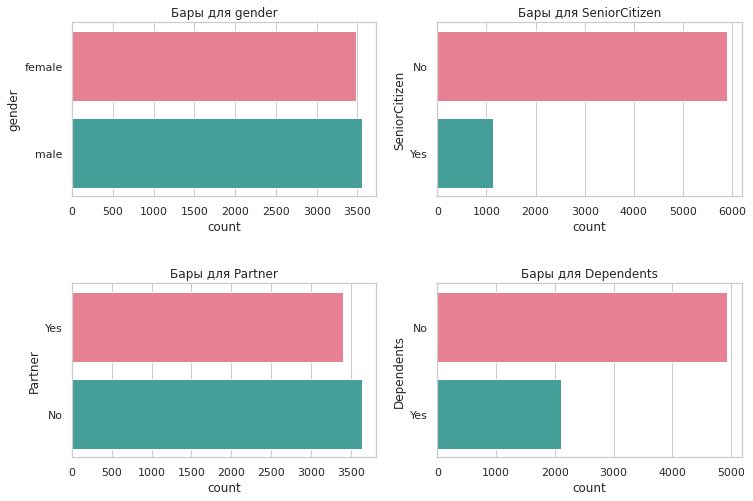

In [17]:
exclude_columns = ['customerID']
cat_columns_personal = [col for col in df_personal.select_dtypes(exclude='number').columns if col not in exclude_columns]
num_columns_personal = df_personal.select_dtypes(include='number').columns.tolist()

plot_hist_box(df_personal, num_columns_personal, cat_columns_personal)

Краткие выводы:
- большинство клиентов не пенсионеры
- примерно равное соотношение мужчин/женщин, женатых/не женатых
- у большинства нету детей

Аномалий и выбросов нет.

#### df_internet

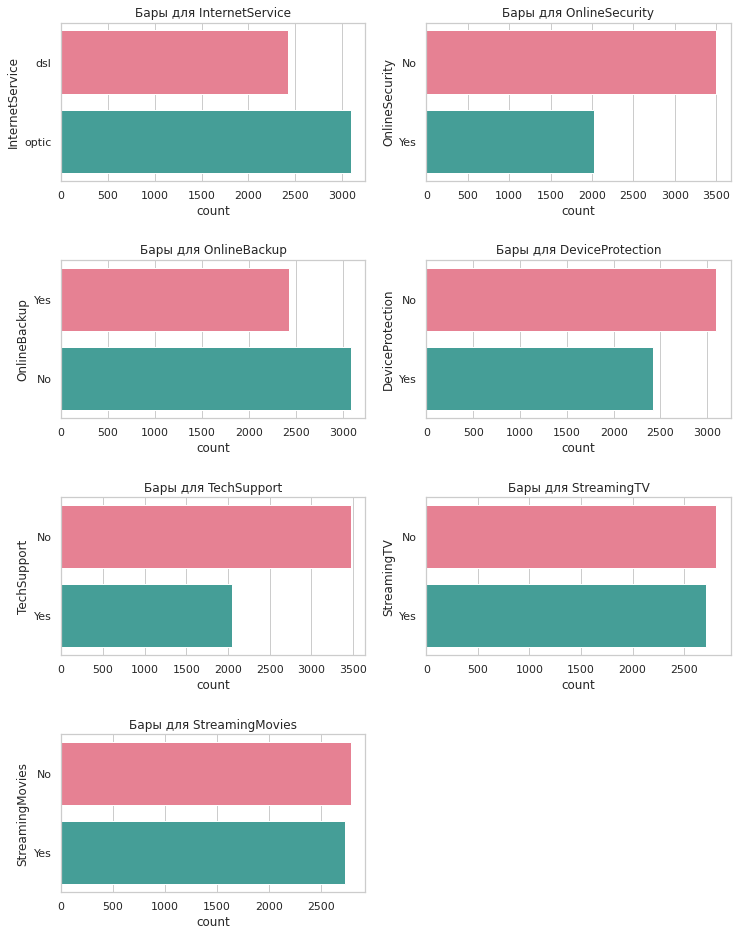

In [18]:
exclude_columns = ['customerID']
cat_columns_internet = [col for col in df_internet.select_dtypes(exclude='number').columns if col not in exclude_columns]
num_columns_internet = df_internet.select_dtypes(include='number').columns.tolist()

plot_hist_box(df_internet, num_columns_internet, cat_columns_internet)

Краткие выводы:
- приблизительно в равных соотношениях клиенты пользуются услугами "каталог фильмов", "стриминговое телевидение", "антивирус", "облачное хранилище"
- менее популярные услуги "выделенная линия технической поддержки", "блокировка опасных сайтов"
- чаще используется опто-волоконный тип подключения

Довольно странная услуга "блокировка опасных сайтов", так как все современные антивирусы уже включают в себя эту функцию.

#### df_phone

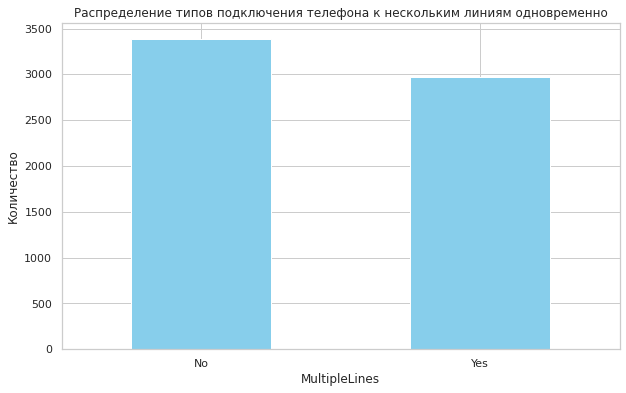

In [19]:
df_phone['MultipleLines'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Распределение типов подключения телефона к нескольким линиям одновременно')
plt.xlabel('MultipleLines')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Ничего необычного, примерно равные соотношения.

### Выводы по разделу:

Проведенный анализ показал, что:

Для df_contract

- средние расходы за месяц 70 рублей
- большинство используют ежемесячный тип оплаты, а также тип платежа "Электронный чек"

Для df_personal
- большинство клиентов не пенсионеры
- примерно равное соотношение мужчин/женщин, женатых/не женатых
- у большинства нету детей

Для df_internet
- приблизительно в равных соотношениях клиенты пользуются услугами "каталог фильмов", "стриминговое телевидение", "антивирус", "облачное хранилище"
- менее популярные услуги "выделенная линия технической поддержки", "блокировка опасных сайтов"
- чаще используется опто-волоконный тип подключения

Для df_phone
- приблизительно равное количество количество клиентов у которых подключен или не подключен телефон к нескольким линиям одновременно, но больше тех у кого не подключен

## Объединение данных

Так как мы решаем задачу связанную с разрывом договора, будет логично объединить при помощи join типом объединения left, так как нам важно сохранить все записи связанные с договорами.

In [20]:
df = df_contract.join([df_personal, df_internet, df_phone], how='left')

display(df.head())
df.shape

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,month-to-month,Yes,electronic check,29.85,31.04,female,No,Yes,No,dsl,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,one year,No,mailed check,56.95,2071.84,male,No,No,No,dsl,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,month-to-month,Yes,mailed check,53.85,226.17,male,No,No,No,dsl,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,one year,No,bank transfer,42.30,1960.60,male,No,No,No,dsl,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,month-to-month,Yes,electronic check,70.70,353.50,female,No,No,No,optic,No,No,No,No,No,No,No


(7032, 19)

### Выводы по разделу

- объединение данных прошло успешно

## Предобработка и исследовательский анализ данных объединённого датафрейма

### Предобработка данных объединённого датафрейма

In [21]:
display(df.isna().sum())

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
MultipleLines        680
dtype: int64

Что ж пропусков много, но удалять их не стоит, данных и так не много. Эти пропуски легко заменить, ведь все пропуски находятся в датафрейме df_internet (интернет услугах), где значения Yes и No. Справедливо полагать, что если значение пропущено, значит услуга не подключена, соответственно можно заполнить значением - No. То же касается пропусков в MultipleLines датафрейма df_phone.

In [22]:
fill_list = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV',
             'StreamingMovies', 'MultipleLines']

df[fill_list] = df[fill_list].fillna('No')
df.isna().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

Взглянем на дубликаты:

In [23]:
df.duplicated().sum()

4

Их мало, можно удалить:

In [24]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Добавление новых признаков и их анализ

После объединения датафреймов и заполнения пропусков, можно добавить еще один признак - duration (длительность), который представляет из себя разность даты окончания и начала договора, представленную в днях. Значения 'No' в EndDate можно заменить актуальностью представления данных - 1 февраля 2020 года. 

In [25]:
df['end'] = df['EndDate']
df['end'] = df['end'].replace('No', '2020-02-01')

# Приведение типов столбцов к datetime
df['end'] = pd.to_datetime(df['end'])

# Создание нового столбца 'duration' с разницей в днях между 'EndDate' и 'BeginDate'
df['duration'] = (df['end'] - df['BeginDate']).dt.days

df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,end,duration
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,month-to-month,Yes,electronic check,29.85,31.04,female,No,Yes,...,dsl,No,Yes,No,No,No,No,No,2020-02-01,31
5575-GNVDE,2017-04-01,No,one year,No,mailed check,56.95,2071.84,male,No,No,...,dsl,Yes,No,Yes,No,No,No,No,2020-02-01,1036
3668-QPYBK,2019-10-01,No,month-to-month,Yes,mailed check,53.85,226.17,male,No,No,...,dsl,Yes,Yes,No,No,No,No,No,2020-02-01,123
7795-CFOCW,2016-05-01,No,one year,No,bank transfer,42.30,1960.60,male,No,No,...,dsl,Yes,No,Yes,Yes,No,No,No,2020-02-01,1371
9237-HQITU,2019-09-01,No,month-to-month,Yes,electronic check,70.70,353.50,female,No,No,...,optic,No,No,No,No,No,No,No,2020-02-01,153


После генерации нового признака, столбцы BeginDate и end не нужны, а столбец EndDate нужно оставить, так как перед обучением его нужно преобразовать в целевой признак.

In [26]:
df = df.drop(columns=['BeginDate', 'end'])
df.head()

,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,No,month-to-month,Yes,electronic check,29.85,31.04,female,No,Yes,No,dsl,No,Yes,No,No,No,No,No,31
5575-GNVDE,No,one year,No,mailed check,56.95,2071.84,male,No,No,No,dsl,Yes,No,Yes,No,No,No,No,1036
3668-QPYBK,No,month-to-month,Yes,mailed check,53.85,226.17,male,No,No,No,dsl,Yes,Yes,No,No,No,No,No,123
7795-CFOCW,No,one year,No,bank transfer,42.30,1960.60,male,No,No,No,dsl,Yes,No,Yes,Yes,No,No,No,1371
9237-HQITU,No,month-to-month,Yes,electronic check,70.70,353.50,female,No,No,No,optic,No,No,No,No,No,No,No,153


Так как данные по структуре после объединения не изменились, строить гистограммы и бары для всех признаков нет смысла, поэтому посмотрим как распределяется новый признак:

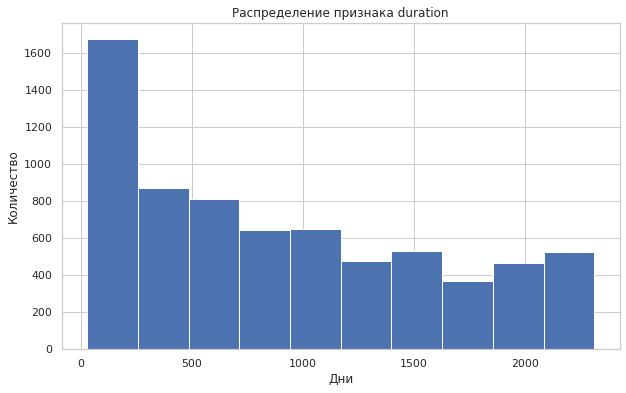

In [27]:
df['duration'].plot(kind='hist', figsize=(10, 6))
plt.title('Распределение признака duration')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Ничего особенно нет, за исключением того, что большинство клиентов относительно новые пользователи.

Также на этом этапе можно сгенерировать целевой признак из EndDate:

In [28]:
df['EndDate'] = df['EndDate'].apply(lambda x: 0 if x == 'No' else 1)
df['EndDate'].value_counts()

EndDate
0    5927
1    1101
Name: count, dtype: int64

Посмотрим как распределяется целевой признак:

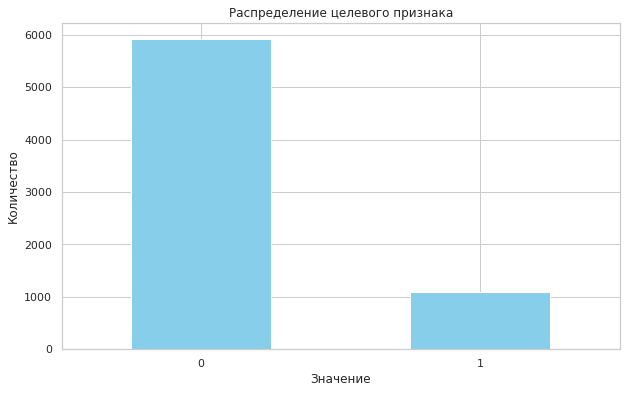

In [29]:
df['EndDate'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Распределение целевого признака')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

На лицо - дисбаланс классов. Учтем это при разделении на тренировочную и тестовую выборки перед обучением.

### Матрица корреляции

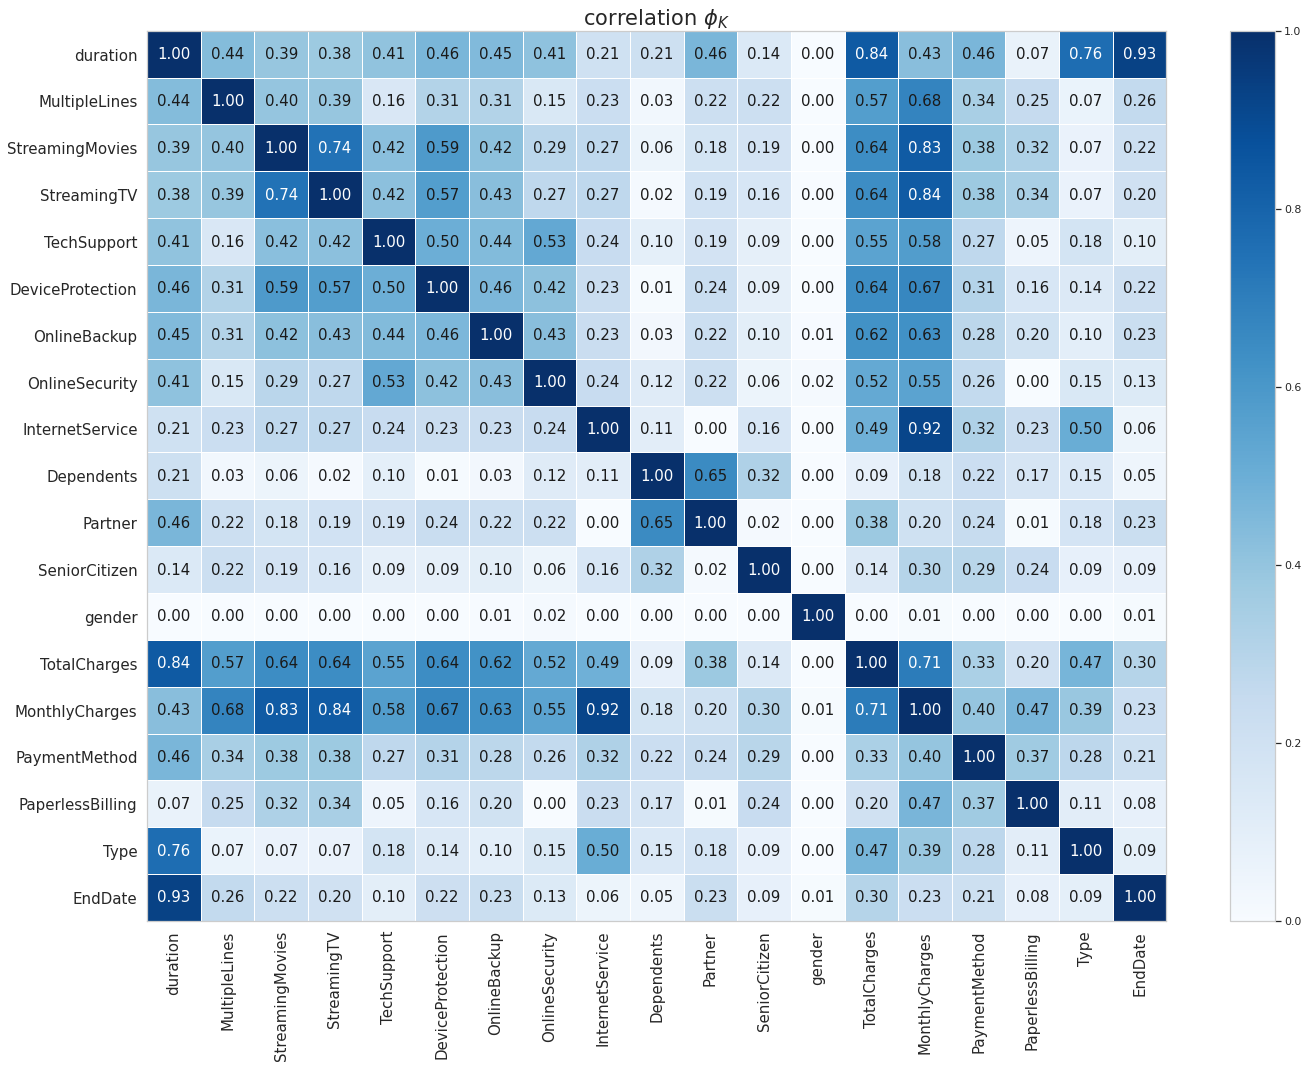

In [30]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['MonthlyCharges', 'TotalCharges']

# считаем корреляции на тренировочной выборке
phik_overview = df.phik_matrix(interval_cols=interval_cols) 

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Из матрицы корреляции видно, что целевой признак, практически со всеми признаками слабая корреляция, среди них можно выделить MultipleLines и TotalCharges с ними корреляция 0.26 и 0.30 соответсвтенно и конечно новый признак duration с корреляцией 0.93. Также можно выделить мультиколлинеарность, но не критичную (критичная от 0.95 и выше) между признаками MonthlyCharges и InternetService, удалять какой то из них не стоит, так как от мультиколлинеарности страдает логистическая регрессия, а мы собираемся использовать не только ее одну.

### Выводы по разделу:

- объединены все датафреймы по ключу customerID, методом join с параметром left
- убраны не логичные признаки из df_contract - BeginDate (в связи с возможной утечкой)
- добавлен признак duration (разность между датой окончания договора и датой заключения договора)
- большинство клиентов относительно новые пользователи, был выявлен дисбаланс классов целеового признака
- максимальная корреляция целевого признака с MultipleLines и TotalCharges, 0.28 и 0.30 соответственно и новый признак duration с корреляцией 0.93
- мультиколлинеарность между MonthlyCharges и InternetService - 0.93

## Подготовка данных

Разделим датасет df_train на тренировочную и тестовую выборку:

In [31]:
X = df.drop(columns='EndDate')
y = df.EndDate

X_train, X_test, y_train, y_test = train_test_split(X, y, \
test_size=0.25, random_state=RANDOM_STATE, stratify=y)

In [32]:
X_train.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration
customerID,,,,,,,,,,,,,,,,,,
9378-FXTIZ,one year,Yes,credit card,70.15,2825.64,female,No,Yes,No,dsl,No,No,No,No,Yes,Yes,Yes,1157
3778-FOAQW,one year,No,mailed check,20.15,483.60,female,No,Yes,No,No,No,No,No,No,No,No,No,730
9889-TMAHG,month-to-month,No,credit card,100.30,1169.50,male,Yes,No,No,optic,Yes,No,No,Yes,Yes,Yes,No,337
9282-IZGQK,month-to-month,Yes,electronic check,85.00,255.00,female,No,No,No,optic,No,No,No,No,No,Yes,Yes,92
5868-YTYKS,month-to-month,Yes,mailed check,20.25,22.07,male,No,No,Yes,No,No,No,No,No,No,No,No,31


### Выводы по разделу

- данные подготовлены для обучения моделей

## Обучение моделей

### Модели требующие обязательной кодировки

Определим категориальные и количественные признаки:

In [33]:
ohe_columns = [
    'Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 
    'SeniorCitizen', 'Partner', 'Dependents',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'MultipleLines'
]


num_columns = ['MonthlyCharges', 'TotalCharges', 'duration'] 

Создадим пайплайн предобработки данных. В качестве кодировки будем использовать OHE для моделей LogisticRegression, KNN и SVC, они чувствительны к порядковым отношениям, OHE поможет их избежать, а OE будем использовать для моделей DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier.

In [34]:
# Пайплайн для OneHotEncoding
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

# Пайплайн для OrdinalEncoding
oe_pipe = Pipeline(
    [('simpleImputer_oe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('oe', OrdinalEncoder())
    ]
)

# Создаем общий ColumnTransformer для обеих кодировок
data_preprocessor_ohe = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

data_preprocessor_oe = ColumnTransformer(
    [('oe', oe_pipe, ohe_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Итоговый пайплайн:

In [35]:
# Итоговый пайплайн для подготовки данных и модели
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor_ohe),  # начальный пайплайн, он будет заменен при GridSearch
    ('models', LogisticRegression())
])

param_grid = [
    # Словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 8),
        'preprocessor': [data_preprocessor_ohe],
        'preprocessor__num': [StandardScaler(), 'passthrough']
    },

    # Словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor': [data_preprocessor_ohe],
        'preprocessor__num': [StandardScaler(), 'passthrough']
    },
    
    # Словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 10],
        'models__kernel': ['rbf', 'poly'],
        'preprocessor': [data_preprocessor_ohe],
        'preprocessor__num': [StandardScaler(), 'passthrough']
    },
    
    # Словарь для модели DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(3, 10),
        'preprocessor': [data_preprocessor_oe],
        'preprocessor__num': [StandardScaler(), 'passthrough']
    },
    
    # Словарь для модели RandomForestClassifier
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100, 200],
        'models__max_depth': range(3, 10),
        'preprocessor': [data_preprocessor_oe],
        'preprocessor__num': [StandardScaler(), 'passthrough']
    },
    
    # Словарь для модели GradientBoostingClassifier
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100, 200],
        'models__max_depth': range(3, 10),
        'preprocessor': [data_preprocessor_oe],
        'preprocessor__num': [StandardScaler(), 'passthrough']
    }
]

# Выполнение GridSearchCV
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

# Проверка работы модели на тестовой выборке
y_test_pred = grid_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe',
                                                  Pipeline(steps=[('simpleImputer_oe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe',
                                                                   OrdinalEncoder())]),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod', 'gender',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                      

Отлично, нужная метрика получена!

### Модели не требующие обязательной кодировки

In [36]:
# Создание модели CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0 , cat_features=ohe_columns)

# Определение сетки гиперпараметров для поиска
param_grid = {
    'iterations': [50, 100, 200],
    'depth': range(3, 10),
    'learning_rate': [0.01, 0.1, 0.3]
}

# Выполнение GridSearchCV
grid_search_ct = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Обучение модели на тренировочной выборке
grid_search_ct.fit(X_train, y_train)

# Вывод лучших параметров и метрики на тренировочной выборке
best_model = grid_search_ct.best_estimator_
print('Лучшая модель и её параметры:\n\n', best_model.get_params())
print('Метрика лучшей модели на тренировочной выборке:', grid_search_ct.best_score_)

# Проверка работы модели на тестовой выборке
y_test_pred = best_model.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 {'verbose': 0, 'random_state': 80724, 'cat_features': ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'], 'depth': 5, 'iterations': 200, 'learning_rate': 0.3}
Метрика лучшей модели на тренировочной выборке: 0.9060439323507344
Метрика ROC-AUC на тестовой выборке: 0.9251453809348547


Метрика получилась еще лучше!

### Выводы по разделу

- требуемая метрика на тестовой выборке roc-auc > 0.85, полученная метрика roc-auc на тестовой выборке = 0.92
- Лучшая модель и ее гиперпараметры:
  - CatBoostClassifier(depth=4, iterations=200, learning_rate=0.3, random_state=80724)

## Анализ важности признаков и моделей

### Для GradientBoostingClassifier

100%|===================| 5246/5271 [00:21<00:00]        

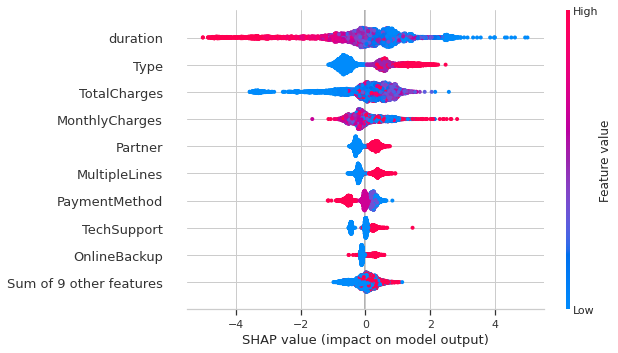

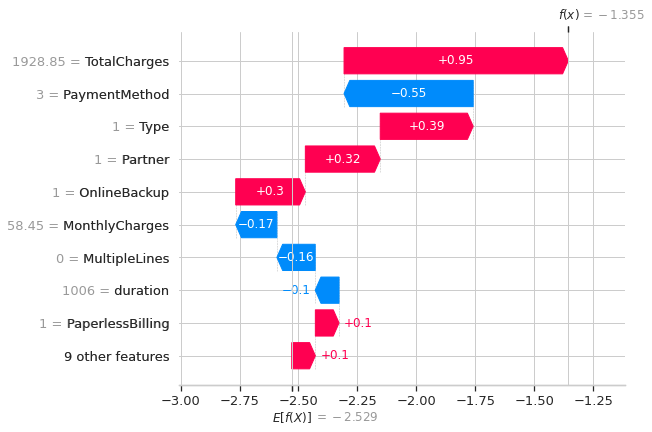

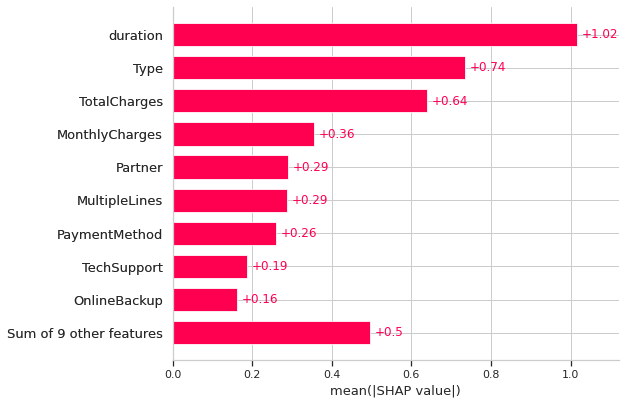

OrdinalEncoder categories:
[array(['month-to-month', 'one year', 'two year'], dtype=object), array(['No', 'Yes'], dtype=object), array(['bank transfer', 'credit card', 'electronic check', 'mailed check'],
      dtype=object), array(['female', 'male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'dsl', 'optic'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object)]

Первые несколько строк закодированных данных:
    Type  PaperlessBilling  PaymentMethod  gender  SeniorCitizen  Partner  \
0   1.0               1.0            1.0     0.0            0.0      1.0   
1   1.0               0.0            3.0     0.0            0.0      1.0   
2   0.0               0.0            1.0     1.0    

In [37]:
# Получение лучшей модели
model = grid_search.best_estimator_

# Получение объекта ColumnTransformer из пайплайна
preprocessor = model.named_steps['preprocessor']

# Получение имен признаков после кодирования
encoded_feature_names = []

# Получение имен признаков после OneHotEncoding
if 'ohe' in preprocessor.named_transformers_:
    encoded_feature_names_ohe = preprocessor.named_transformers_['ohe'].named_steps['ohe'].get_feature_names_out(input_features=ohe_columns)
    encoded_feature_names.extend(encoded_feature_names_ohe)

# Получение имен признаков после OrdinalEncoding
if 'oe' in preprocessor.named_transformers_:
    encoded_feature_names_ord = preprocessor.named_transformers_['oe'].named_steps['oe'].get_feature_names_out(input_features=ohe_columns)
    encoded_feature_names.extend(encoded_feature_names_ord)

# Добавление имен числовых признаков
encoded_feature_names_num = num_columns
encoded_feature_names.extend(encoded_feature_names_num)

# Создание датафрейма из подготовленных данных и списка названий столбцов
X_train_pre = pd.DataFrame(preprocessor.transform(X_train), columns=encoded_feature_names)

# Объяснение модели с помощью SHAP
if isinstance(model.named_steps['models'], LogisticRegression):
    explainer = shap.LinearExplainer(model.named_steps['models'], X_train_pre)
else:
    explainer = shap.Explainer(model.named_steps['models'], X_train_pre)

shap_values = explainer(X_train_pre)

# Визуализация результатов SHAP
shap.plots.beeswarm(shap_values)
shap.plots.waterfall(shap_values[5])
shap.plots.bar(shap_values)

# Получение подробной информации о кодировании
if 'ohe' in preprocessor.named_transformers_:
    print("OneHotEncoder categories:")
    print(preprocessor.named_transformers_['ohe'].named_steps['ohe'].categories_)

if 'oe' in preprocessor.named_transformers_:
    print("OrdinalEncoder categories:")
    print(preprocessor.named_transformers_['oe'].named_steps['oe'].categories_)

# Пример первых нескольких строк закодированных данных
print("\nПервые несколько строк закодированных данных:\n", X_train_pre.head())

### Для CatBoost

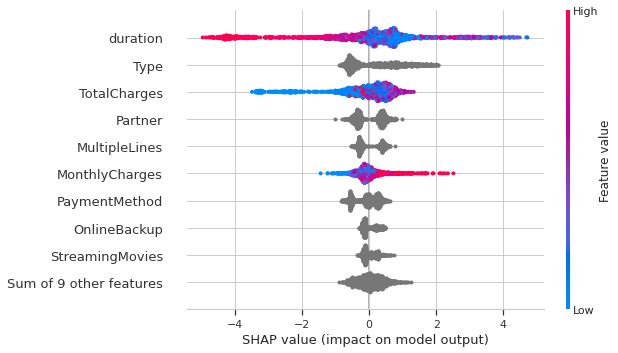

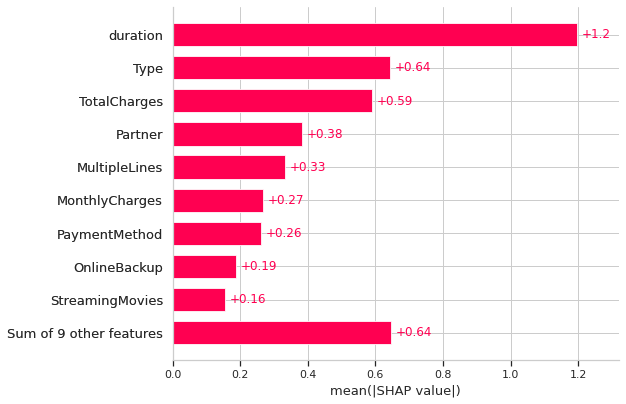

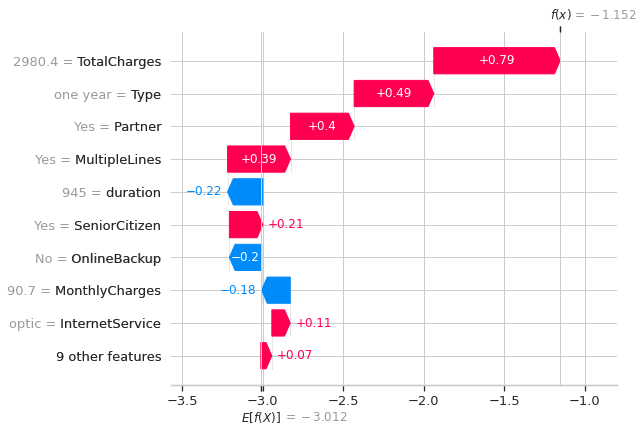

In [38]:
# Создание объекта объяснимости с использованием лучшей модели
explainer = shap.TreeExplainer(best_model)

# Расчет значений SHAP для тестовых данных
shap_values = explainer(X_test)

# Визуализация важности признаков: Beeswarm Plot
shap.plots.beeswarm(shap_values)

# Визуализация важности признаков: Bar Plot
shap.plots.bar(shap_values)

# Визуализация важности признаков для одного наблюдения (индекс 0): Waterfall Plot
shap.plots.waterfall(shap_values[0])

По интерпретации в целом модели очень похоже распределили важность признаков:
- чем больше значение duration, тем выше вероятность присвоить объекту класс 0 (объект не уйдет), также этот признак вносит самый большой общий вклад в предсказания модели (в принципе достаточно логично)
- клиент с договором на 2 года вероятнее не будет продлевать договор, то есть уйдет
- чем меньше клиент потратит всего денег (TotalCharges), тем меньше вероятность, что он уйдет, соответственно чем больше он платит ежемесячно (MonthlyCharges) , тем больше вероятность, что он останется
- Также больше вероятности, что клиент расторгнет договор если он женат/замужем (Partner), подключен телефона к нескольким линиям одновременно (MultipleLines), имеет выделенную линию технической поддержки (TechSupport), имеет облачно хранилище (OnlineBackup).
- меньше вероятности, что клиент уйдет если он оплачивает услуги на почте  (PaymentMethod)

Так как CatBoost стала лучшей моделью построим для нее матрицу ошибок

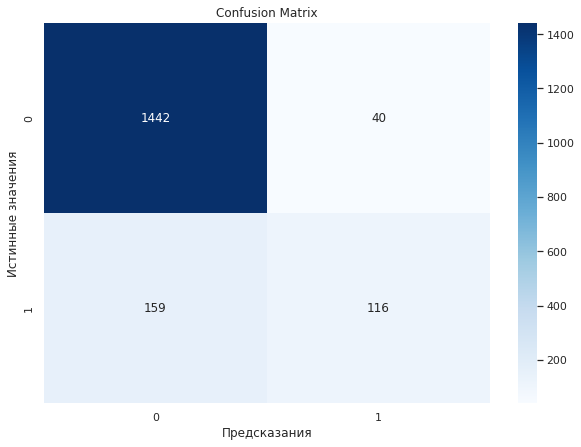

In [39]:
# Предсказание меток классов для тестовых данных
y_test_pred_labels = grid_search.best_estimator_.predict(X_test)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_test_pred_labels)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказания')
plt.ylabel('Истинные значения')
plt.title('Confusion Matrix')
plt.show()


Наша модель в чаще совершает ошибку 2-го рода, то есть False Negative(FN), когда модель предсказывает, что клиент не уйдет, а он уходит. Но в целом это не так критично, так как точность модели очень высока.

### Выводы по разделу

Скажу честно, с анализом важности признаков помучался, но чат GPT помог (да простит меня мой ментор Александр) и то раза с пятидесятого) Тут пришла друга проблема, а как интерпретировать все это? Ведь с количественным все понятно, например чем больше длительность, тем выше вероятность того, что модель отнесет их к классу 0, то есть клиент не ушел, с категориальными не все так просто. Как я понял, моя модель использовала OE поэтому если взять признак Type, то она закодировала ежемесячно как 0, годовая - 1, два года - 2. Поэтому если подписка на 2 года выше вероятность того, что модель присвоит объекту класс 1, то есть клиент уйдет. Поправь меня, Александр, если я не прав и ушел в дебри машинного обучения. А пока выводы на основе моих рассуждений. 


По интерпретации в целом модели очень похоже распределили важность признаков:
- чем больше значение duration, тем выше вероятность присвоить объекту класс 0 (объект не уйдет), также этот признак вносит самый большой общий вклад в предсказания модели (в принципе достаточно логично)
- клиент с договором на 2 года вероятнее не будет продлевать договор, то есть уйдет
- чем меньше клиент потратит всего денег (TotalCharges), тем меньше вероятность, что он уйдет, соответственно чем больше он платит ежемесячно (MonthlyCharges) , тем больше вероятность, что он останется
- Также больше вероятности, что клиент расторгнет договор если он женат/замужем (Partner), подключен телефона к нескольким линиям одновременно (MultipleLines), имеет выделенную линию технической поддержки (TechSupport), имеет облачно хранилище (OnlineBackup).
- меньше вероятности, что клиент уйдет если он оплачивает услуги на почте  (PaymentMethod)

## Общий вывод и рекомендации заказчику

В выпускном проекте "Телекоммуникации" проводились исследования с целью прогнозирования оттока клиентов, для стоижения этой цели решалась задача построения модели классификации. 

При загрузке данных были выявлены следующие проблемы:

- в файле contract_new.csv два столбца с датой BeginDate и EndDate, однако дата корректно выгрузилась только из столбца BeginDate, так как в столбце EndDate есть строковые значения 'No'
- в этом же файле последний столбец TotalCharges, не первый взгляд должны быть все численные значения, но тип данных указывается как object. Значит что то не так.
- явно обозначенного целевого признака нет, есть предположения, которые проверим в следующем разделе

Затем проведена предобработка и анализ всех датафреймов и проведенный анализ показал, что:

Для df_contract

- средние расходы за месяц 70 рублей большинство используют ежемесячный тип оплаты, а также тип платежа "Электронный чек"

Для df_personal

- большинство клиентов не пенсионеры примерно равное соотношение мужчин/женщин, женатых/не женатых у большинства нету детей

Для df_internet

- приблизительно в равных соотношениях клиенты пользуются услугами "каталог фильмов", "стриминговое телевидение", "антивирус", "облачное хранилище" менее популярные услуги "выделенная линия технической поддержки", "блокировка опасных сайтов" чаще используется опто-волоконный тип подключения

Для df_phone

- приблизительно равное количество количество клиентов у которых подключен или не подключен телефон к нескольким линиям одновременно, но больше тех у кого не подключен

После этого датафрейм был успешно, объединен, предобработан и сделаны следущие выводы

- объединены все датафреймы по ключу customerID, методом join с параметром left
- убраны не логичные признаки из df_contract - BeginDate (в связи с возможной утечкой)
- добавлен признак duration (разность между датой окончания договора и датой заключения договора)
- большинство клиентов относительно новые пользователи, был выявлен дисбаланс классов целеового признака
- максимальная корреляция целевого признака с MultipleLines и TotalCharges, 0.28 и 0.30 соответственно и новый признак duration с корреляцией 0.93
- мультиколлинеарность между MonthlyCharges и InternetService - 0.93

Затем подготовленные данные подверглись машинному обучению, признаки на которых обучалась модель:
- Type
- PaperlessBilling
- PaymentMethod
- MonthlyCharges
- TotalCharges
- gender
- SeniorCitizen
- Partner
- Dependents
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- MultipleLines	- duration


Требуемая метрика на тестовой выборке roc-auc > 0.85, полученная метрика roc-auc = 0.88
- Лучшая модель и ее гиперпараметры:
  - CatBoostClassifier(depth=4, iterations=200, learning_rate=0.3, random_state=80724))
  
Проведен анализ важности признаков, который показал:

- чем больше значение duration, тем выше вероятность присвоить объекту класс 0 (объект не уйдет), также этот признак вносит самый большой общий вклад в предсказания модели (в принципе достаточно логично)
- клиент с договором на 2 года вероятнее не будет продлевать договор, то есть уйдет
- чем меньше клиент потратит всего денег (TotalCharges), тем меньше вероятность, что он уйдет, соответственно чем больше он платит ежемесячно (MonthlyCharges) , тем больше вероятность, что он останется
- Также больше вероятности, что клиент расторгнет договор если он женат/замужем (Partner), подключен телефона к нескольким линиям одновременно (MultipleLines), имеет выделенную линию технической поддержки (TechSupport), имеет облачно хранилище (OnlineBackup).
- меньше вероятности, что клиент уйдет если он оплачивает услуги на почте  (PaymentMethod)

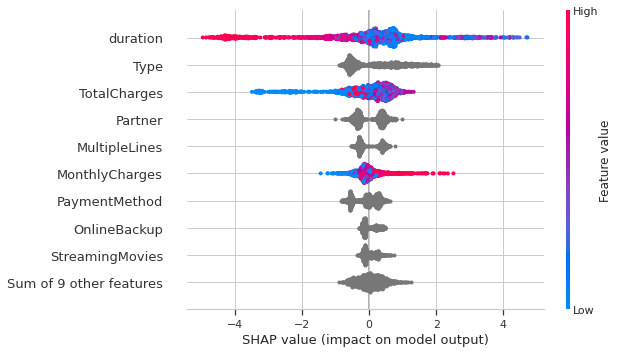
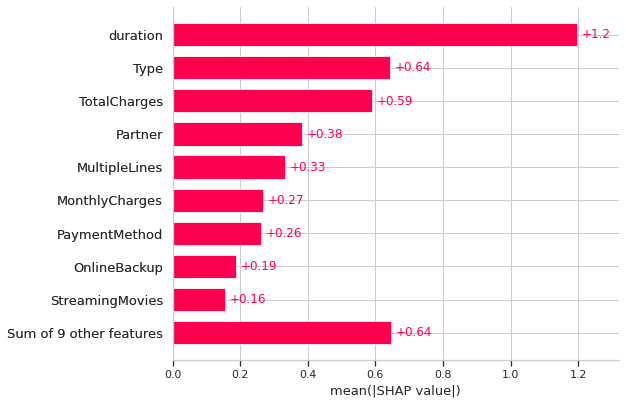

Матрица ошибок:

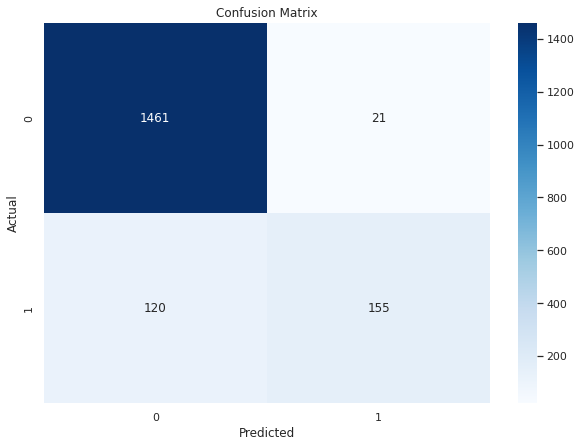

Наша модель в чаще совершает ошибку 2-го рода, то есть False Negative(FN), когда модель предсказывает, что клиент не уйдет, а он уходит. Но в целом это не так критично, так как точность модели очень высока.

Рекомендации заказчику:

- для удержания клиентов предлагать акции и специальные предложения по снижению стоимости ежемесячной подписки
- предлагать уникальные акции для женатых/замужних клиентов, например снижение цены на облачное хранилище
- улучшить условия для оплаты услуг на почте (например добавить рекламу возможности оплаты услуг по интернету для пенсионеров